# Comparing similarity judgments among blind individuals to word embeddings

## Load verbs

In [8]:
import pandas as pd

from tqdm import tqdm

In [3]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")

In [5]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


## Obtain word embeddings for each word

In [6]:
from allennlp.commands.elmo import ElmoEmbedder

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [7]:
elmo = ElmoEmbedder()

In [18]:
embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0]
    
    embeddings.append(decontextualized)

100%|██████████| 105/105 [00:19<00:00,  5.51it/s]


In [19]:
df_verbs['embedding'] = embeddings

## Dimensionality reduce

In [20]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

In [35]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [41]:
# Kind of ugly, fix later
df_verbs['pc1'] = list(principalDf['pc1'])
df_verbs['pc2'] = list(principalDf['pc2'])

In [44]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.037971504, 0.18279701, -0.43743902, -0.573...",-0.078842,-2.348415
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.28699243, -1.3215936, 1.4362316, 0.0064920...",-2.234202,2.968997
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633, 1.3946615, 0.05981894, -0.8057064...",-2.213183,0.445976
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.22016907, 0.06947102, -0.70361733, -0.33632...",-3.475587,0.088671
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750278, 0.28932655, 0.46055782, -0.39144...",-4.541229,2.242403


## Plot

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


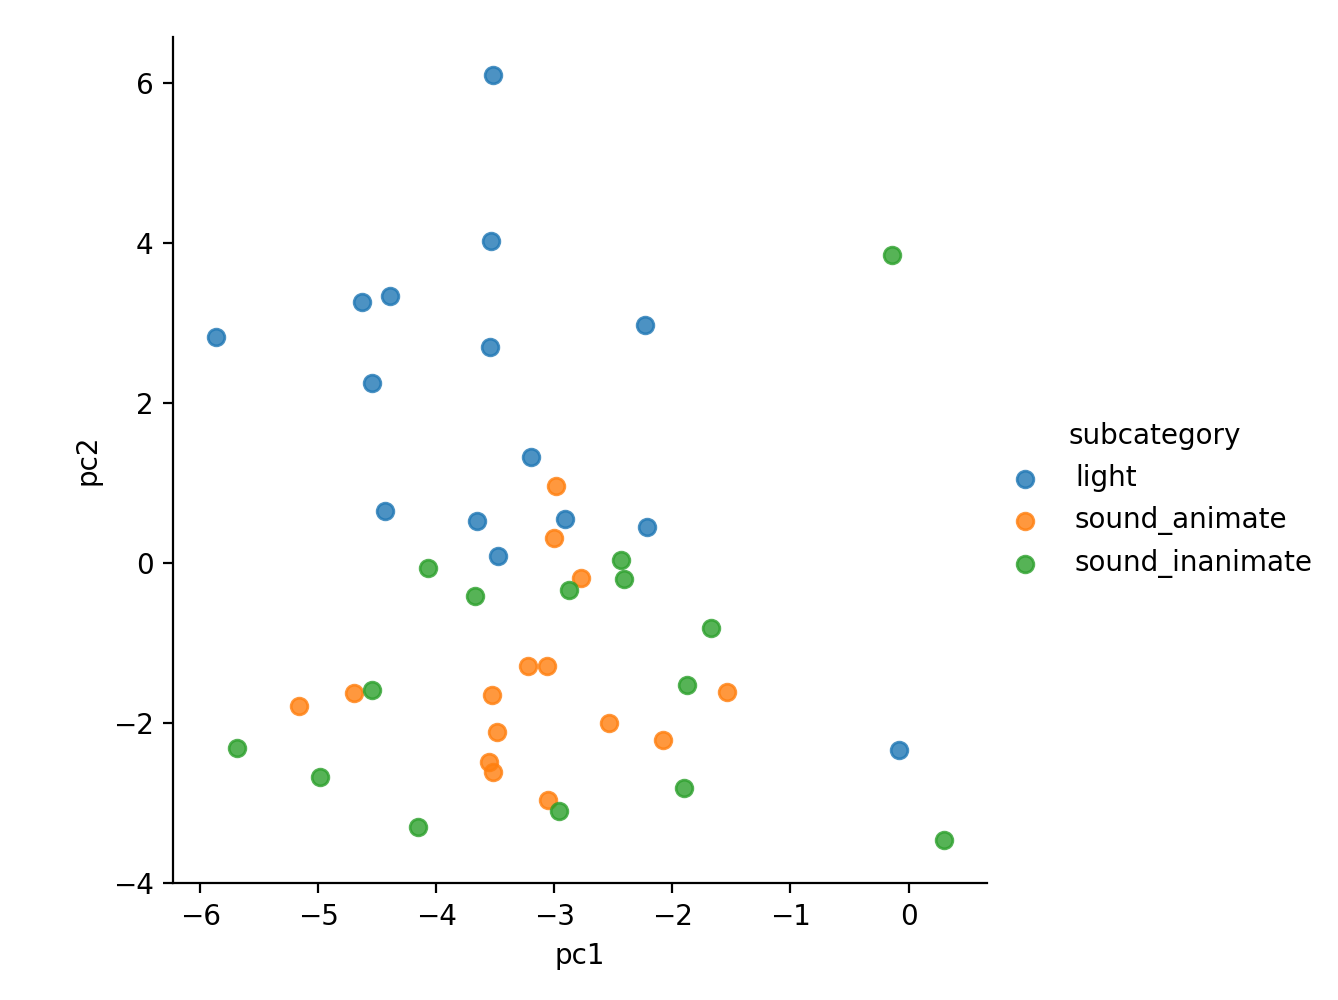

In [54]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], fit_reg=False, hue='subcategory', legend=True)

<IPython.core.display.Javascript object>


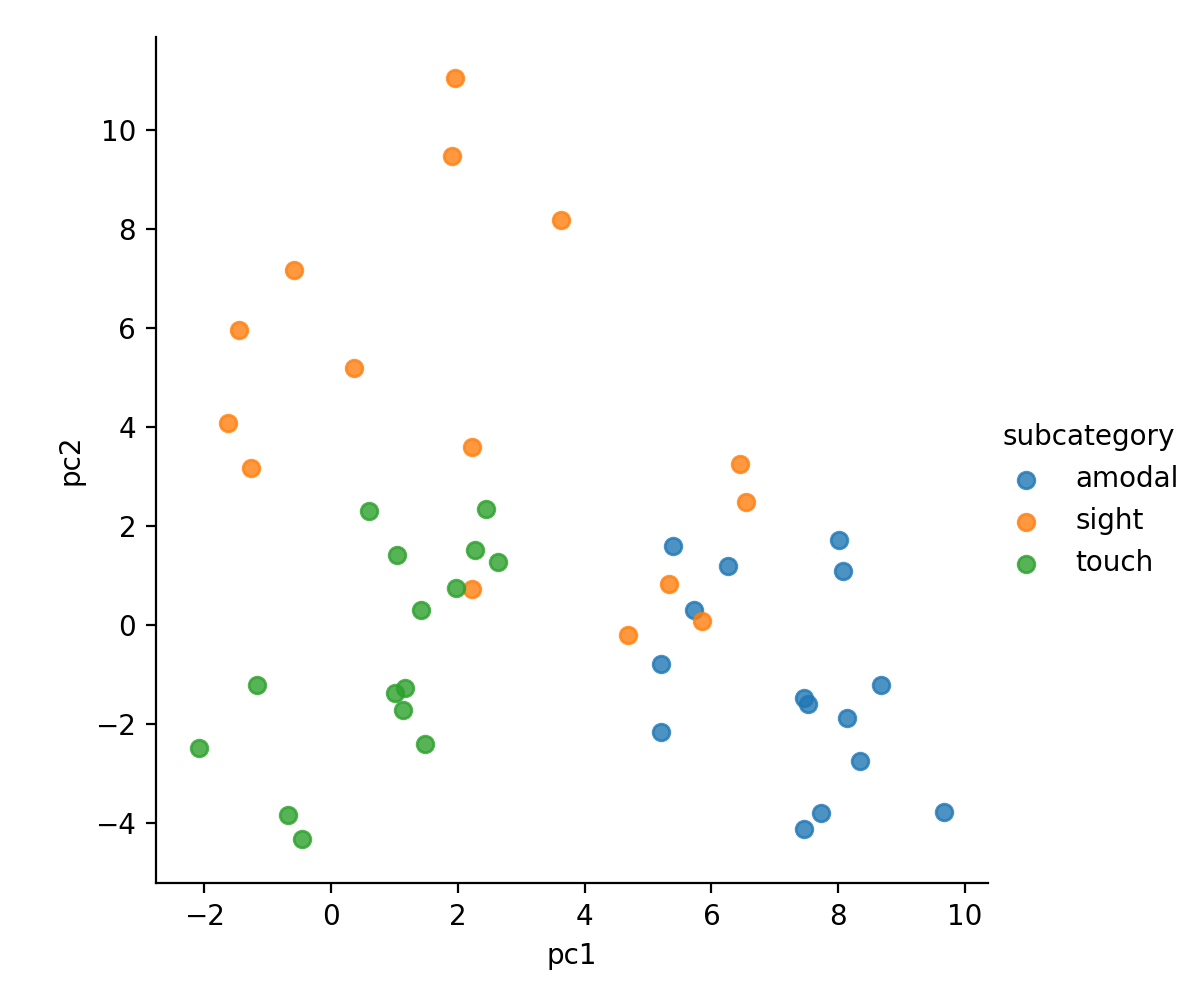

In [55]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], fit_reg=False, hue='subcategory', legend=True)